In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from sklearn.metrics import roc_auc_score,roc_curve

In [5]:
#loading the data
df=pd.read_csv('/content/brain_stroke.csv')

In [6]:
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1538,Female,40.0,0,0,Yes,Private,Urban,70.13,23.6,never smoked,0
1438,Female,26.0,0,0,No,Private,Rural,108.20,26.2,never smoked,0
4815,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
174,Male,63.0,0,0,Yes,Private,Urban,208.65,30.7,never smoked,1
2824,Female,6.0,0,0,No,children,Rural,66.33,18.6,Unknown,0
224,Female,79.0,0,1,Yes,Self-employed,Urban,67.84,25.2,smokes,0
2345,Male,4.0,0,0,No,children,Rural,62.48,19.9,Unknown,0
433,Male,35.0,0,0,Yes,Private,Urban,89.32,36.7,Unknown,0
554,Female,73.0,0,0,Yes,Govt_job,Urban,219.53,40.9,never smoked,0
1574,Female,52.0,1,0,Yes,Private,Rural,213.54,32.0,never smoked,0


In [7]:
df.shape

(4981, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
# no null values in the data
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [10]:
# checking if any duplicates in the data.
df.duplicated().any()

False

# -  **Exploratory** **Data**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

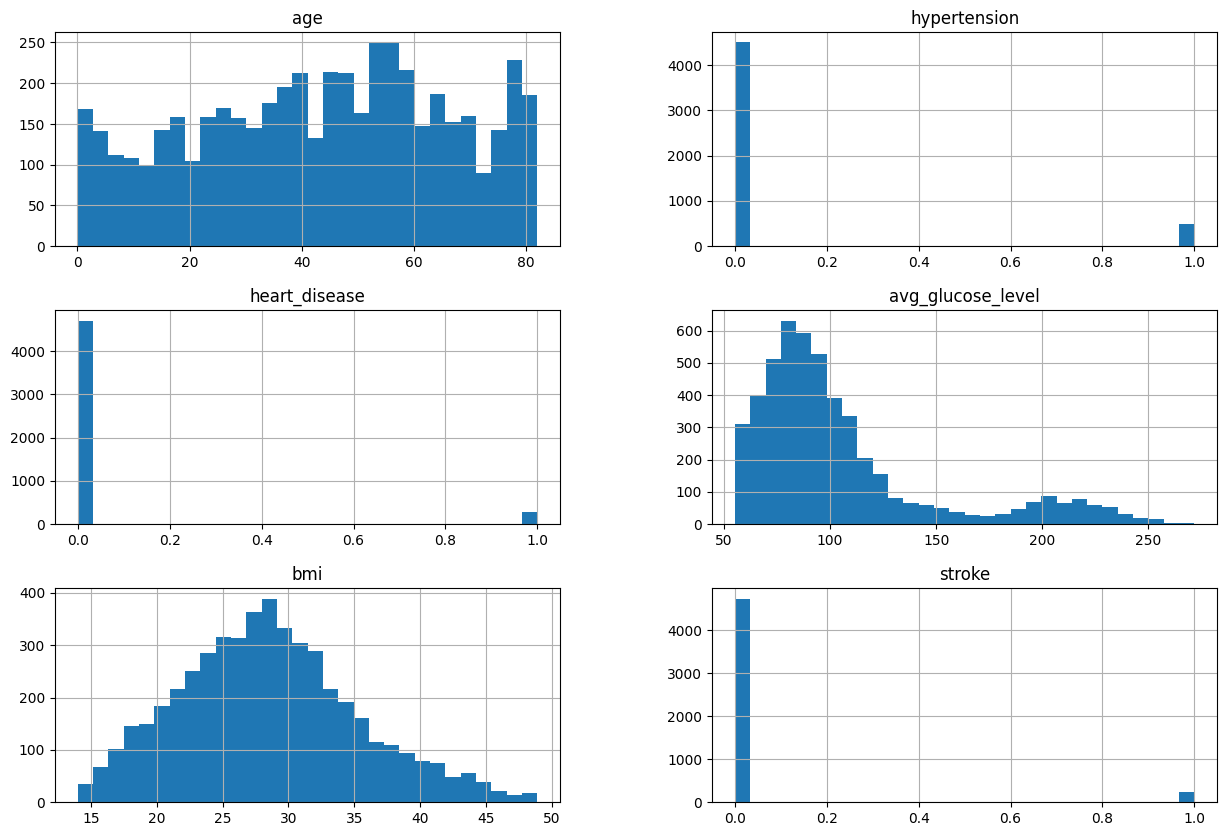

In [11]:
#histogram of uni-variate
df.hist(bins=30, figsize=(15,10))

->age is equally distributed

->avg_glucose_level and bmi are skewed to the right, showing a positive distribution.

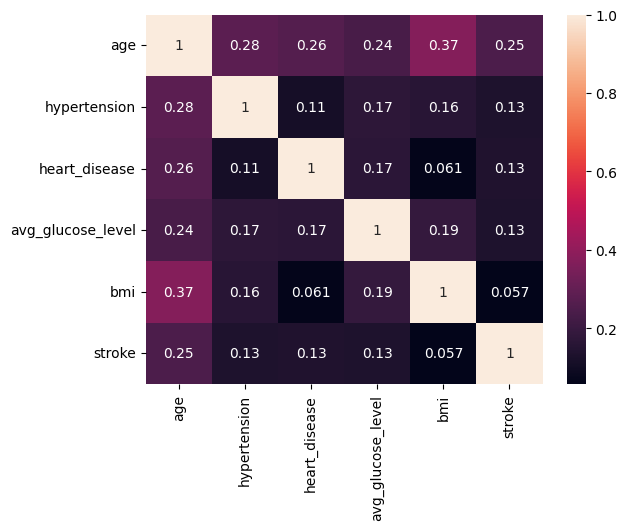

In [12]:
# bi-variante
numerical_df = df.select_dtypes(exclude='object')
sns.heatmap(numerical_df.corr(), annot=True);

- Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
- All categories have a positive correlation to each other no -ve

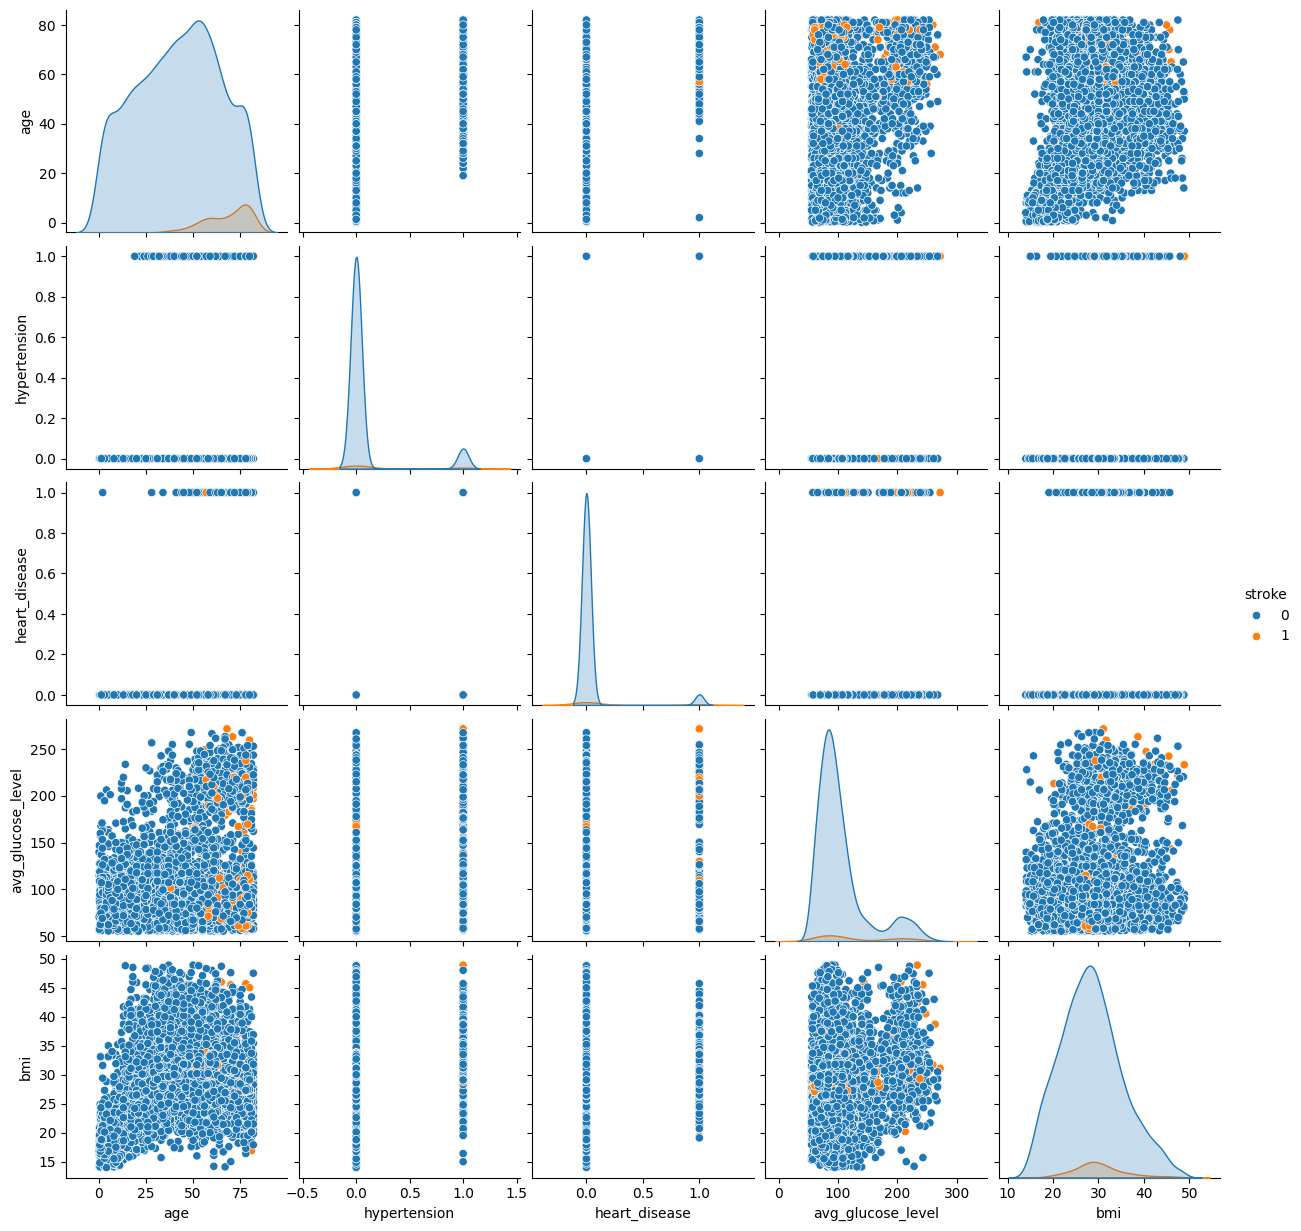

In [13]:
sns.pairplot(df, hue='stroke')

- the data is highly unbalanced

Text(0, 0.5, 'Patient Count')

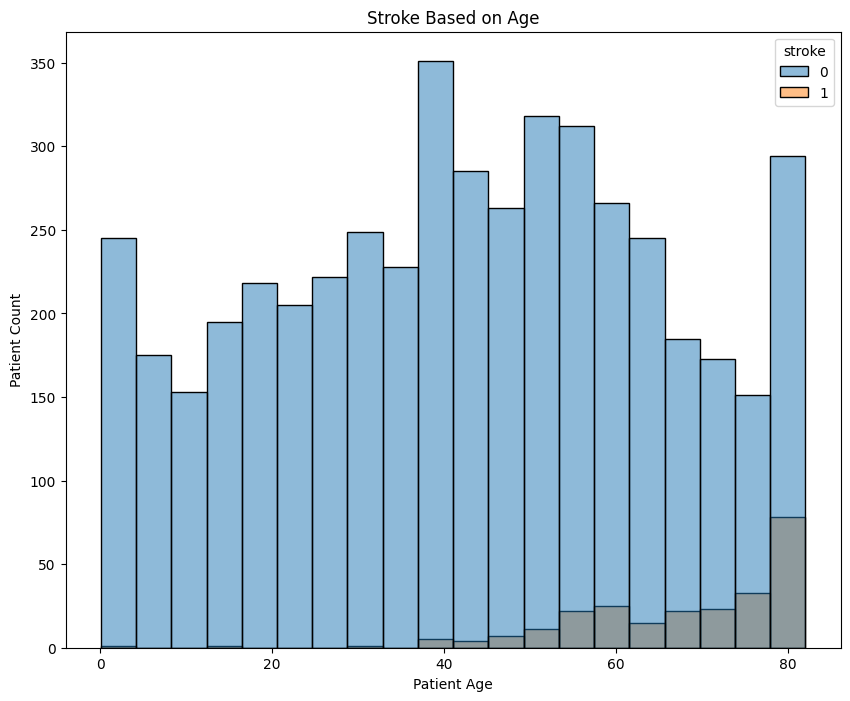

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='age', hue='stroke')
plt.title('Stroke Based on Age')
plt.xlabel('Patient Age')
plt.ylabel('Patient Count')

- Age is equally distributed
- avg_glucose_level and bmi are skewed to the right
- Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
- All categories have a positive correlation to each other (no negatives)
- Data is highly unbalanced
- Changes of stroke increase as you age, but people, according to this data, generally do not have strokes.

# - **Exploratory Visualization**

# **strokes based on age**

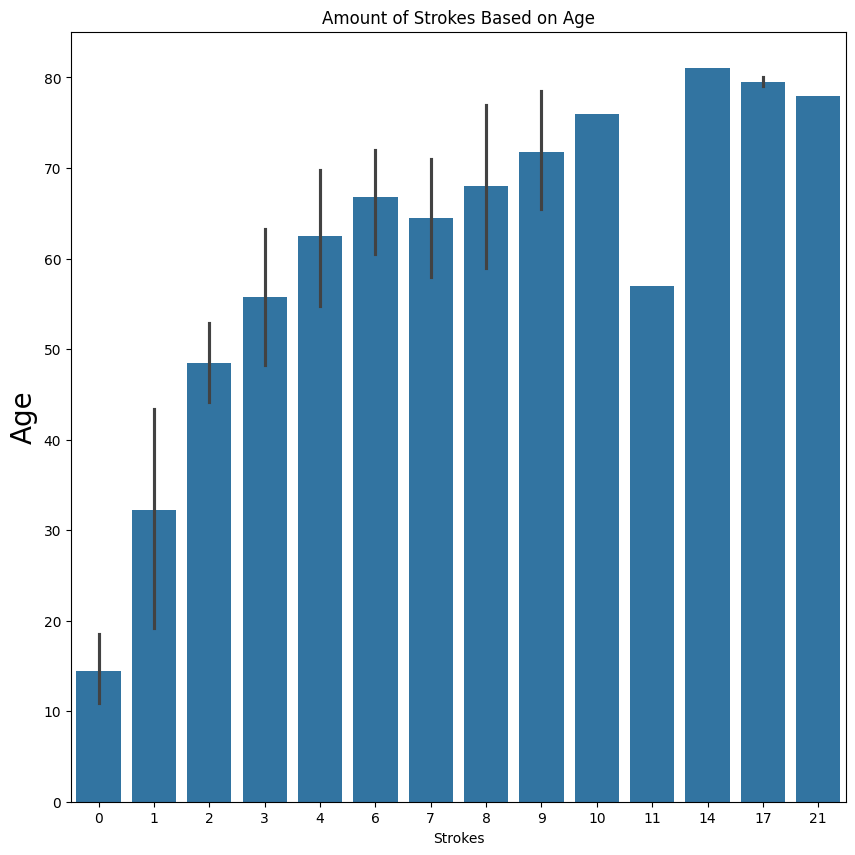

In [15]:
plt.figure(figsize=(10,10))
health = df.groupby('age')['stroke'].sum()
sns.barplot(y=health.index, x=health)
plt.xlabel('Strokes')
plt.ylabel('Age', fontsize=20)
plt.title('Amount of Strokes Based on Age');

##### **strokes increase by age of 80 year **

#### **BMI effect on stroke**

Text(0, 0.5, 'BMI')

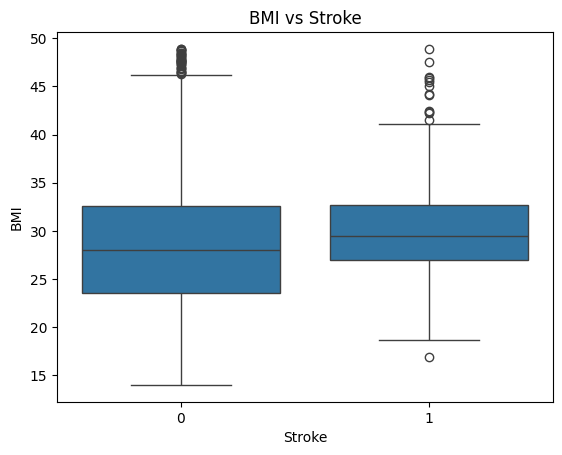

In [16]:
sns.boxplot(data = df, x=df.stroke, y=df.bmi)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')

Text(0, 0.5, 'Patient Count')

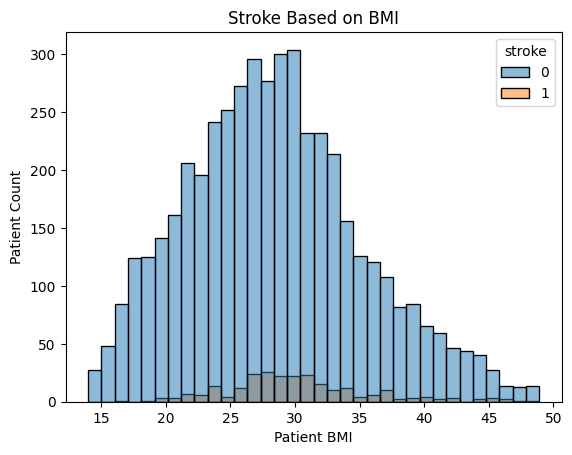

In [17]:
sns.histplot(data=df, x='bmi', hue='stroke')
plt.title('Stroke Based on BMI')
plt.xlabel('Patient BMI')
plt.ylabel('Patient Count')

Text(0.5, 1.0, 'BMI Vs Strokes')

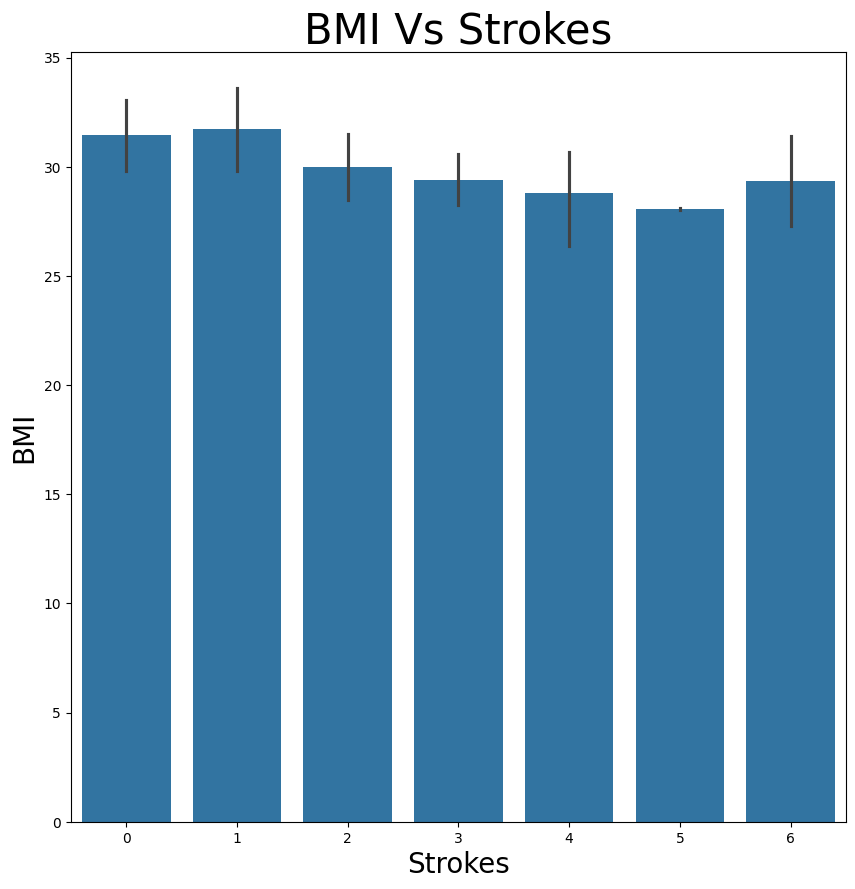

In [18]:
plt.figure(figsize=(10,10))
health_bmi = df.groupby('bmi')['stroke'].sum()
sns.barplot(y=health_bmi.index, x=health_bmi)
plt.xlabel('Strokes', fontsize=20)
plt.ylabel('BMI', fontsize=20)
plt.title('BMI Vs Strokes', fontsize=30)

Text(0.5, 1.0, 'Avg Glucose Vs Strokes')

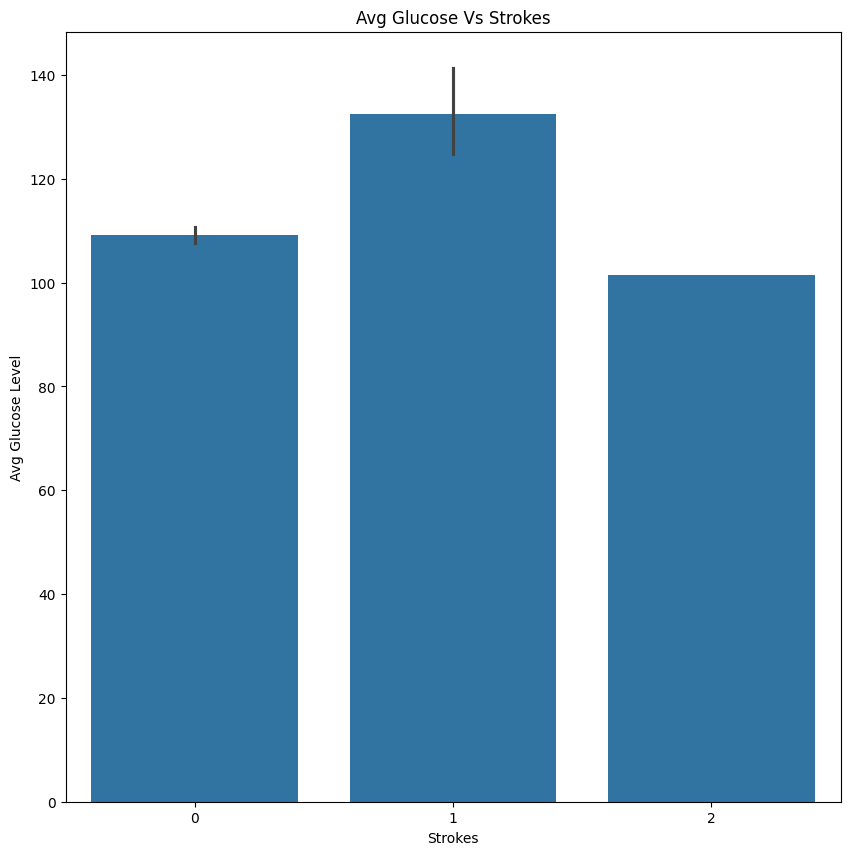

In [19]:
plt.figure(figsize=(10,10))
health_glucose = df.groupby('avg_glucose_level')['stroke'].sum()
sns.barplot(y=health_glucose.index, x=health_glucose)
plt.xlabel('Strokes')
plt.ylabel('Avg Glucose Level')
plt.title('Avg Glucose Vs Strokes')

Text(0, 0.5, 'BMI')

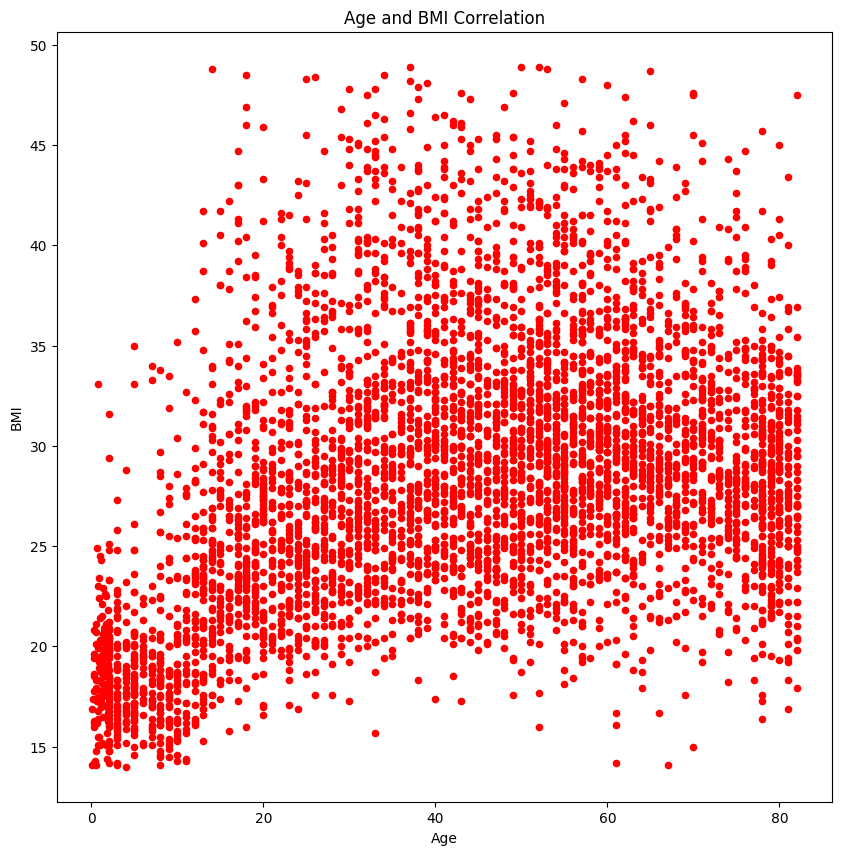

In [20]:
df.plot.scatter(x='age', y='bmi', figsize=(10,10), color='r')
plt.title('Age and BMI Correlation')
plt.xlabel('Age')
plt.ylabel('BMI')

In [21]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [22]:
# to overcome the data leakage problem we are going to split the data in initial stage only
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [23]:
len(X_train),len(Y_train)

(4482, 4482)

In [24]:
len(X_test),len(Y_test)

(499, 499)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [26]:
X_train_num_cols=X_train.select_dtypes(exclude='object')
X_train_cat_cols=X_train.select_dtypes(include='object')

In [27]:
X_test_num_cols=X_test.select_dtypes(exclude='object')
X_test_cat_cols=X_test.select_dtypes(include='object')

In [28]:
#Converting X_train_cat_cols and X_test_cat_cols to numerical
X_train_cat_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status
2940,Male,Yes,Private,Urban,Unknown
586,Male,Yes,Govt_job,Rural,never smoked
1551,Female,Yes,Self-employed,Urban,smokes
2763,Male,Yes,Private,Rural,smokes
2655,Female,Yes,Govt_job,Rural,formerly smoked


In [29]:
X_train_cat_cols.reset_index(drop=True,inplace=True)

In [30]:
# since gender,ever_married,work_type,residence_type are nomial im using onehot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder(handle_unknown='ignore')
one_hot.fit(X_train_cat_cols[['gender','ever_married','work_type','Residence_type']])
f=one_hot.transform(X_train_cat_cols[['gender','ever_married','work_type','Residence_type']]).toarray()
v=pd.DataFrame(data=f)
v.columns=one_hot.get_feature_names_out()
X_train_cat_cols=pd.concat([X_train_cat_cols,v],axis=1)
X_train_cat_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,Male,Yes,Private,Urban,Unknown,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Male,Yes,Govt_job,Rural,never smoked,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Female,Yes,Self-employed,Urban,smokes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Male,Yes,Private,Rural,smokes,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Female,Yes,Govt_job,Rural,formerly smoked,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# since smoking_status is ordinal im using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
od_en=OrdinalEncoder()
od_en.fit(X_train_cat_cols[['smoking_status']])
p=od_en.transform(X_train_cat_cols[['smoking_status']])
f=pd.DataFrame(data=p)
f.columns=od_en.get_feature_names_out()

In [32]:
od_en.categories_

[array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [33]:
f

,smoking_status
0,0.0
1,2.0
2,3.0
3,3.0
4,1.0
...,...
4477,2.0
4478,2.0
4479,2.0
4480,0.0


In [34]:
X_train_cat_cols=X_train_cat_cols.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
X_train_cat_cols.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train_cat_cols.columns

Index(['gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban'],
      dtype='object')

In [36]:
X_train_cat_cols=pd.concat([X_train_cat_cols,f],axis=1)
X_train_cat_cols.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [37]:
X_test_cat_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1129,Female,Yes,Private,Urban,Unknown
3671,Female,No,children,Rural,Unknown
1041,Male,No,children,Rural,Unknown
2072,Female,Yes,Self-employed,Rural,smokes
1375,Female,Yes,Govt_job,Rural,Unknown


In [38]:
p=one_hot.transform(X_test_cat_cols[['gender','ever_married','work_type','Residence_type']]).toarray()
f=od_en.transform(X_test_cat_cols[['smoking_status']])

In [39]:
p_=pd.DataFrame(data=p)
p_.columns=one_hot.get_feature_names_out()
p_.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
f_=pd.DataFrame(data=f)
f_.columns=od_en.get_feature_names_out()
f_.head()

,smoking_status
0,0.0
1,0.0
2,0.0
3,3.0
4,0.0


In [41]:
g=pd.concat([p_,f_],axis=1)
g.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
X_test_cat_cols=X_test_cat_cols.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
X_test_cat_cols.head()

""
1129
3671
1041
2072
1375


In [43]:
X_test_cat_cols.reset_index(drop=True,inplace=True)

In [44]:
X_test_cat_cols=pd.concat([X_test_cat_cols,g],axis=1)
X_test_cat_cols.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Handling Outliers

In [45]:
def outliers(X_train_num_cols,var):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=X_train_num_cols[var])
    plt.show()

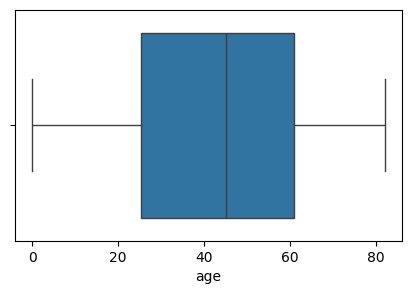

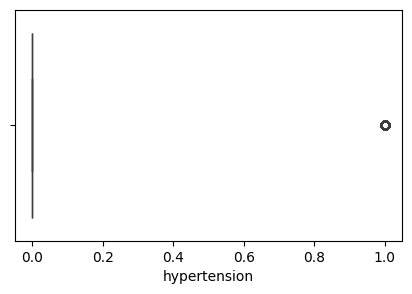

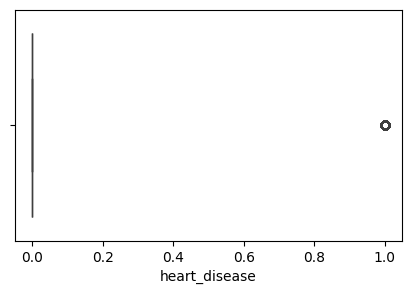

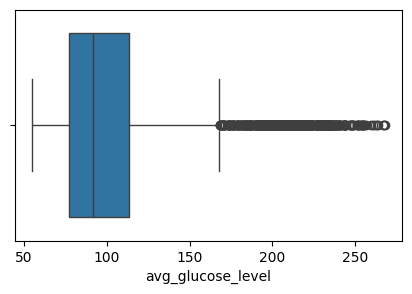

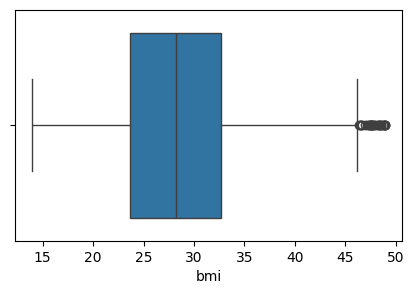

In [46]:
for i in X_train_num_cols.columns:
    outliers(X_train_num_cols,i)

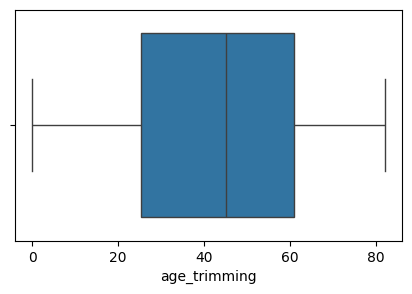

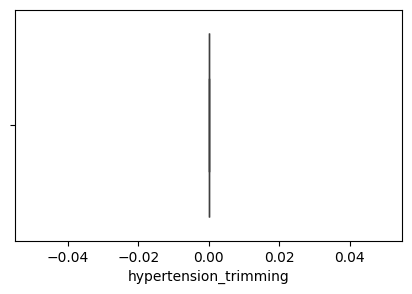

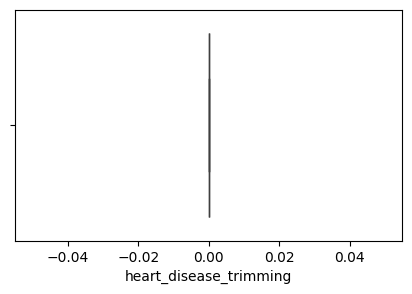

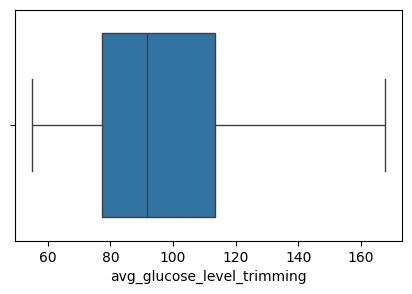

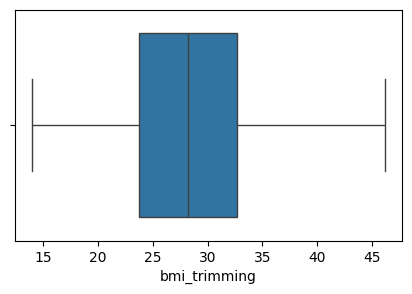

In [47]:
# trimming on X_train_num_cols
def fun_1(df,var):
    iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
    upper=df[var].quantile(0.75)+(1.5*iqr)
    lower=df[var].quantile(0.25)-(1.5*iqr)
    return upper ,lower
for i in X_train_num_cols.columns:
    upper_value,lower_value=fun_1(X_train_num_cols,i)
    X_train_num_cols[i+'_trimming']=np.where(X_train_num_cols[i]>upper_value,upper_value,
        np.where(X_train_num_cols[i]<lower_value,lower_value,X_train_num_cols[i]))
for j in X_train_num_cols.columns:
    if '_trimming' in j:
        outliers(X_train_num_cols,j)

In [48]:
X_train_num_cols.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'age_trimming', 'hypertension_trimming', 'heart_disease_trimming',
       'avg_glucose_level_trimming', 'bmi_trimming'],
      dtype='object')

In [49]:
X_train_num_cols=X_train_num_cols.drop(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],axis=1)

In [50]:
X_train_num_cols.columns

Index(['age_trimming', 'hypertension_trimming', 'heart_disease_trimming',
       'avg_glucose_level_trimming', 'bmi_trimming'],
      dtype='object')

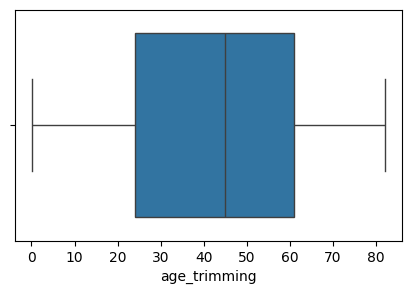

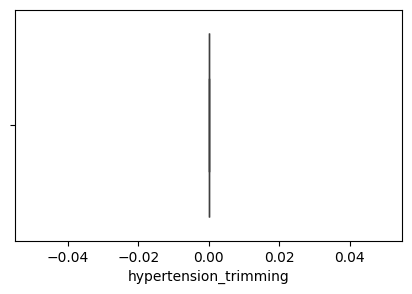

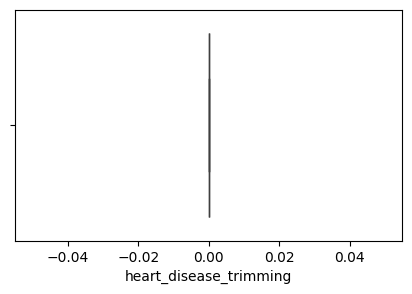

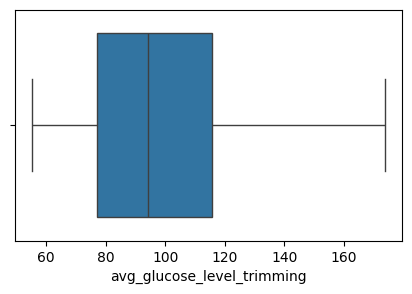

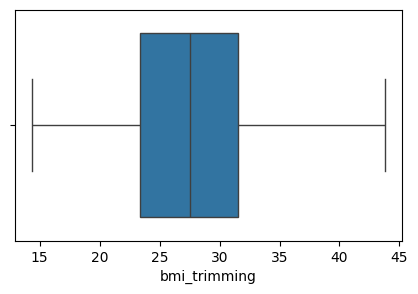

In [51]:
# trimming on X_test_num_cols
def fun_1(df,var):
    iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
    upper=df[var].quantile(0.75)+(1.5*iqr)
    lower=df[var].quantile(0.25)-(1.5*iqr)
    return upper ,lower
for i in X_test_num_cols.columns:
    upper_value,lower_value=fun_1(X_test_num_cols,i)
    X_test_num_cols[i+'_trimming']=np.where(X_test_num_cols[i]>upper_value,upper_value,
        np.where(X_test_num_cols[i]<lower_value,lower_value,X_test_num_cols[i]))
for j in X_test_num_cols.columns:
    if '_trimming' in j:
        outliers(X_test_num_cols,j)

In [52]:
X_test_num_cols=X_test_num_cols.drop(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],axis=1)

In [53]:
X_test_num_cols.columns

Index(['age_trimming', 'hypertension_trimming', 'heart_disease_trimming',
       'avg_glucose_level_trimming', 'bmi_trimming'],
      dtype='object')

In [54]:
X_train_num_cols.reset_index(drop=True,inplace=True)

In [55]:
# joiining the data
X_train_cleaned=pd.DataFrame()
X_train_cleaned=pd.concat([X_train_num_cols,X_train_cat_cols],axis=1)
X_train_cleaned.head()

,age_trimming,hypertension_trimming,heart_disease_trimming,avg_glucose_level_trimming,bmi_trimming,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status
0,56.0,0.0,0.0,78.93,31.1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,65.0,0.0,0.0,111.85,26.7,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,50.0,0.0,0.0,85.92,37.3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,42.0,0.0,0.0,107.83,35.3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
4,58.0,0.0,0.0,73.36,36.6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [56]:
X_test_num_cols.reset_index(drop=True,inplace=True)

In [57]:
X_test_cleaned=pd.DataFrame()
X_test_cleaned=pd.concat([X_test_num_cols,X_test_cat_cols],axis=1)
X_test_cleaned.head(5)

,age_trimming,hypertension_trimming,heart_disease_trimming,avg_glucose_level_trimming,bmi_trimming,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status
0,65.00,0.0,0.0,173.735,26.9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,11.00,0.0,0.0,93.510,20.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.56,0.0,0.0,93.740,20.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,49.00,0.0,0.0,68.440,23.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
4,49.00,0.0,0.0,107.910,25.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
# constant -> any column variance is zero means we can remove the column
vt=VarianceThreshold(threshold=0.0)
vt.fit(X_train_cleaned)

VarianceThreshold()

In [59]:
X_train_cleaned.columns[~vt.get_support()]

Index(['hypertension_trimming', 'heart_disease_trimming'], dtype='object')

In [60]:
X_train_cleaned=X_train_cleaned.drop(['hypertension_trimming', 'heart_disease_trimming'],axis=1)
X_test_cleaned=X_test_cleaned.drop(['hypertension_trimming', 'heart_disease_trimming'],axis=1)

In [61]:
X_test_cleaned.shape

(499, 14)

In [62]:
X_train_cleaned.shape

(4482, 14)

In [63]:
# quasi_constant -> variance should be 0.1
vt=VarianceThreshold(threshold=0.1)
vt.fit(X_train_cleaned)

VarianceThreshold(threshold=0.1)

In [64]:
X_train_cleaned.columns[~vt.get_support()]

Index([], dtype='object')

In [65]:
# hypothesis testing correlation [pearson_correlation] and p_value
co=[]
for i in X_train_cleaned.columns:
    s=pearsonr(X_train_cleaned[i],Y_train)
    co.append(s)
co=np.array(co)
co

array([[ 2.39917332e-01,  1.05345959e-59],
       [ 1.18178944e-01,  2.06405504e-15],
       [ 5.47868748e-02,  2.42939276e-04],
       [-1.08973381e-02,  4.65775164e-01],
       [ 1.08973381e-02,  4.65775164e-01],
       [-1.05302941e-01,  1.57767853e-12],
       [ 1.05302941e-01,  1.57767853e-12],
       [ 2.39030633e-03,  8.72895882e-01],
       [ 1.37098383e-02,  3.58812707e-01],
       [ 5.61710874e-02,  1.68257572e-04],
       [-8.28417868e-02,  2.79090600e-08],
       [-2.13927319e-02,  1.52155426e-01],
       [ 2.13927319e-02,  1.52155426e-01],
       [ 1.97782070e-02,  1.85547409e-01]])

In [66]:
p_value=pd.Series(co[:,1] , index=X_train_cleaned.columns)
p_value

,0
age_trimming,1.053460e-59
avg_glucose_level_trimming,2.064055e-15
bmi_trimming,2.429393e-04
gender_Female,4.657752e-01
gender_Male,4.657752e-01
ever_married_No,1.577679e-12
ever_married_Yes,1.577679e-12
work_type_Govt_job,8.728959e-01
work_type_Private,3.588127e-01
work_type_Self-employed,1.682576e-04


In [67]:
k=[]
g=list(p_value)
for i in p_value:
    if i>0.05:
        k.append(list(g).index(i))
print(k)

[3, 3, 7, 8, 11, 11, 13]


<Axes: >

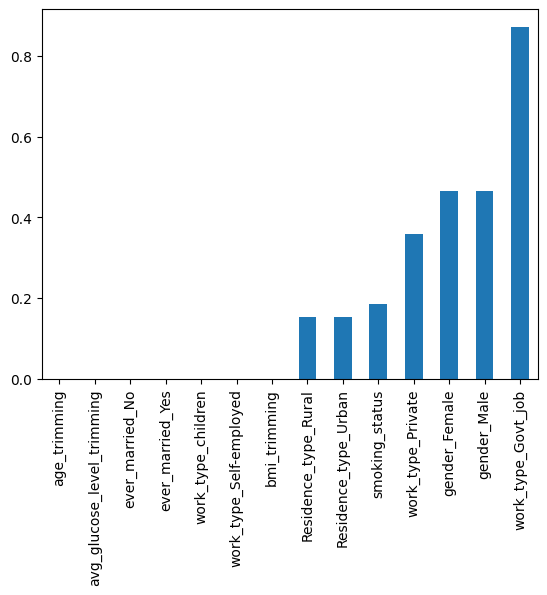

In [68]:
p_value.sort_values(ascending=True).plot.bar()

In [69]:
X_train_cleaned.columns

Index(['age_trimming', 'avg_glucose_level_trimming', 'bmi_trimming',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status'],
      dtype='object')

In [70]:
X_train_cleaned=X_train_cleaned.drop(['Residence_type_Rural','Residence_type_Urban','smoking_status','gender_Female','gender_Male','work_type_Private','work_type_Govt_job'],axis=1)

In [71]:
X_test_cleaned=X_test_cleaned.drop(['Residence_type_Rural','Residence_type_Urban','smoking_status','gender_Female','gender_Male','work_type_Private','work_type_Govt_job'],axis=1)

In [72]:
X_test_cleaned.shape

(499, 7)

In [73]:
X_train_cleaned.shape

(4482, 7)

In [74]:
Y_train.value_counts()

,count
stroke,
0,4265
1,217


In [75]:
# using upsampling balacing the data
!pip install imblearn

In [76]:
Y_train=np.array(Y_train).ravel()
Y_test=np.array(Y_test).ravel()

In [77]:
print('labels count for 0 ={}'.format(sum(Y_train==0)))
print('labels count for 1 ={}'.format(sum(Y_train==1)))
print()
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_up,Y_train_up=sm.fit_resample(X_train_cleaned,Y_train)
print('labels count for 0 ={}'.format(sum(Y_train_up==0)))
print('labels count for 1 ={}'.format(sum(Y_train_up==1)))

labels count for 0 =4265
labels count for 1 =217

labels count for 0 =4265
labels count for 1 =4265


# Model Prediction

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid,relu

In [79]:
model=Sequential() # sequential is used to build architectures and is a class -> model is an object for that
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim=7)) # HL1
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # HL2
model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu')) # HL3
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # HL4
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid')) # Op

In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,193 (12.47 KB)

 Trainable params: 3,193 (12.47 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [82]:
# now i will give the data to the architecture
model.fit(X_train_up,Y_train_up,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6297 - loss: 0.5821 - val_accuracy: 0.7802 - val_loss: 0.8440
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6652 - loss: 0.5547 - val_accuracy: 0.9683 - val_loss: 0.6982
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7081 - loss: 0.5257 - val_accuracy: 0.6723 - val_loss: 0.9239
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6983 - loss: 0.5277 - val_accuracy: 0.7251 - val_loss: 0.8766
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6958 - loss: 0.5301 - val_accuracy: 0.7667 - val_loss: 0.7761
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7041 - loss: 0.5254 - val_accuracy: 0.7046 - val_loss: 0.8257
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7289 - loss: 0.5122 - val_accuracy: 0.7937 - val_loss: 0.7228
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7111 - loss: 0.5155 - val_accuracy: 0

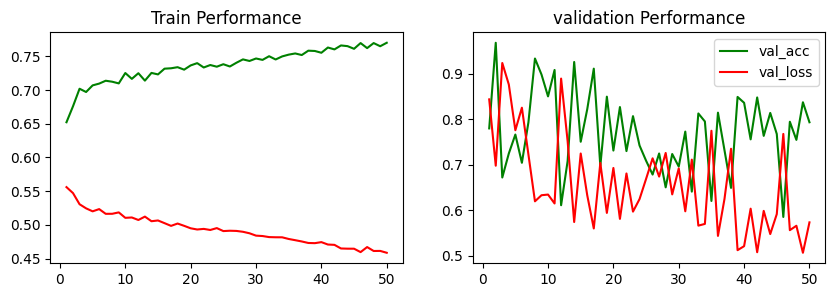

In [83]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label='Train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label='Train_loss')

plt.subplot(1,2,2)
plt.title('validation Performance')
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label='val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label='val_loss')
plt.legend(loc=0)
plt.show()

In [84]:
X_test_cleaned.head()

,age_trimming,avg_glucose_level_trimming,bmi_trimming,ever_married_No,ever_married_Yes,work_type_Self-employed,work_type_children
0,65.00,173.735,26.9,0.0,1.0,0.0,0.0
1,11.00,93.510,20.8,1.0,0.0,0.0,1.0
2,1.56,93.740,20.1,1.0,0.0,0.0,1.0
3,49.00,68.440,23.0,0.0,1.0,1.0,0.0
4,49.00,107.910,25.0,0.0,1.0,0.0,0.0


In [85]:
l=[]
for i in X_test_cleaned.columns:
    l.append(X_test_cleaned[i][2])
l

[1.56, 93.74, 20.1, 1.0, 0.0, 0.0, 1.0]

In [86]:
l=np.array(l).reshape(1,-1)
l.shape

(1, 7)

In [87]:
# giving the data to the trained data
if model.predict(l)[0][0] > 0.5:
    print(1)
else:
    print(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
0


In [88]:
Y_test_pred=model.predict(X_test_cleaned)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [89]:
Y_test_pred

array([[7.01711595e-01],
       [8.48070532e-03],
       [4.53055371e-03],
       [2.70409107e-01],
       [3.78051013e-01],
       [7.02754915e-01],
       [4.28799447e-03],
       [5.90922952e-01],
       [2.83054169e-03],
       [7.40594184e-03],
       [2.49416262e-01],
       [2.97269430e-02],
       [4.83591063e-03],
       [8.16506594e-02],
       [7.03840077e-01],
       [2.06157210e-06],
       [1.50249125e-02],
       [7.03840077e-01],
       [2.43363559e-01],
       [1.11695416e-01],
       [2.43377872e-03],
       [1.69584319e-01],
       [3.99412028e-02],
       [2.23116949e-02],
       [6.89878583e-01],
       [1.55443087e-01],
       [8.01623420e-11],
       [7.03840077e-01],
       [7.03840077e-01],
       [2.72579640e-01],
       [4.48362023e-01],
       [4.38467979e-01],
       [3.64900142e-01],
       [2.36525878e-01],
       [4.71735775e-01],
       [2.31853453e-03],
       [1.83546439e-01],
       [8.28809277e-07],
       [4.64184225e-01],
       [1.25029392e-03],


In [90]:
c=[]
for i in Y_test_pred:
    if i>0.5:
        c.append(1)
    else:
        c.append(0)

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [92]:
confusion_matrix(Y_test,c)

array([[364, 104],
       [  8,  23]])

In [93]:
accuracy_score(Y_test,c)

0.7755511022044088

In [94]:
import tensorflow as tf
x = tf.convert_to_tensor([[1.56, 93.74, 20.1, 1.0, 0.0, 0.0, 1.0]])
if model.predict([x])[0]==1:
    print('Stroke')
else:
    print('No Stroke')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
No Stroke


In [95]:
import xgboost as xgb
xg= xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False)

xg.fit(X_train_up,Y_train_up)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [96]:
Y_pred =xg.predict(X_test_cleaned)

In [97]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8937875751503006


In [98]:
if xg.predict([[1.56, 93.74, 20.1, 1.0, 0.0, 0.0,1.0]])[0]==1:
    print('stroke')
else:
    print('No stroke')

No stroke


In [99]:
fpr_ann,tpr_ann,treshold=roc_curve(Y_test,Y_test_pred)
fpr_xgb,tpr_xgb,treshold=roc_curve(Y_test,Y_pred)

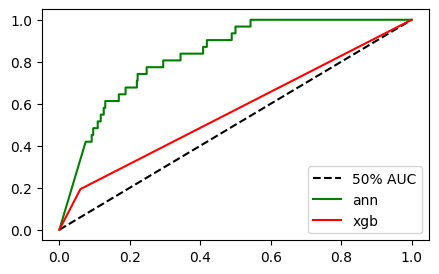

In [100]:
plt.figure(figsize=(5,3))
plt.plot([0,1],[0,1],'k--',label='50% AUC')
plt.plot(fpr_ann,tpr_ann,color='g',label='ann')
plt.plot(fpr_xgb,tpr_xgb,color='r',label='xgb')
plt.legend(loc=0)
plt.show()

In [101]:
# since the by using auc,roc curves the more area is under ANN algorithm so we choose ANN as best Model.